### Controlling the pendulum with a PD controller

The PD controller can be defined as:

$$
\tau = K_p (\theta_d - \theta) + K_d (\omega_d - \omega)
$$

$\tau$ = applied torque at the hinge joint\\
$K_p$ = Proportional Gain  
$K_d$ = Derivative Gain  
$\theta_d, \omega_d$ = Desired Rotational Position and velocity  
$\theta, \omega$ = Current Rotational Position and velocity


In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
g = 9.81      # gravitational acceleration (m/s^2)
m = 0.5       # mass of pendulum (kg)
l = 0.5       # length of pendulum (m)
b = 0.1       # Damping coefficient (Ns/m)
dt = 0.01     # time step for integration (s)
T = 10        # total simulation time (s)

In [3]:
# Initial conditions
theta_0 = 0          # initial angle (0 degrees)
omega_0 = 0.0        # initial angular velocity

In [4]:
# Final conditions
theta_f = np.pi      # final angle (180 degrees)
omega_f = 0.0        # final angular velocity

In [5]:
# Initialize arrays to store the results
time = np.arange(0, T+dt, dt)
theta = np.zeros(len(time))
omega = np.zeros(len(time))

In [6]:
# Initilaize the gains
Kp = 10
Kd = 3

In [7]:
# Set initial and final values
theta[0] = theta_0
omega[0] = omega_0
theta[-1] = theta_f
omega[-1] = omega_f

In [8]:
# Numerical integration using Euler's method
for i in range(1, len(time)):
    # Compute angular acceleration
    Tau = Kp * ( theta_f - theta[i - 1] ) + Kd * (omega_f - omega[i - 1])
    alpha = -(b / (m*l**2)) * omega[i - 1] - (g / l) * np.sin(theta[i - 1]) + Tau/(m*l**2)
    
    # Update angular velocity and angle
    omega[i] = omega[i - 1] + alpha * dt
    theta[i] = theta[i - 1] + omega[i] * dt


<IPython.core.display.Javascript object>


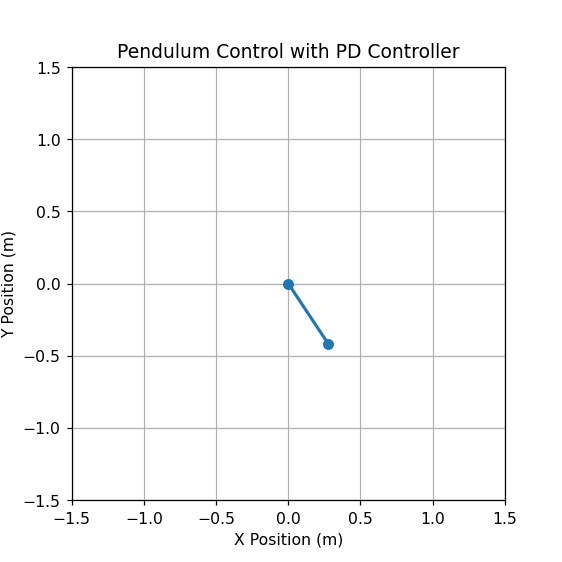

In [9]:
# Visualization
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([0, l * np.sin(theta[0])], [0, -l * np.cos(theta[0])])
    return line,

def update(frame):
    x = l * np.sin(theta[frame])
    y = -l * np.cos(theta[frame])
    line.set_data([0, x], [0, y])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True, interval=dt*1000)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Pendulum Control with PD Controller")
plt.show()



### Controlling the pendulum with a PD controller and a torque limit of 1 Nm

In [10]:
# Numerical integration using Euler's method
for i in range(1, len(time)):
    # Compute angular acceleration
    Tau = Kp * ( theta_f - theta[i - 1] ) + Kd * (omega_f - omega[i - 1])
    Tau = np.clip(Tau, -1, 1) 
    alpha = -(b / (m*l**2)) * omega[i - 1] - (g / l) * np.sin(theta[i - 1]) + Tau/(m*l**2)
    
    # Update angular velocity and angle
    omega[i] = omega[i - 1] + alpha * dt
    theta[i] = theta[i - 1] + omega[i] * dt


<IPython.core.display.Javascript object>


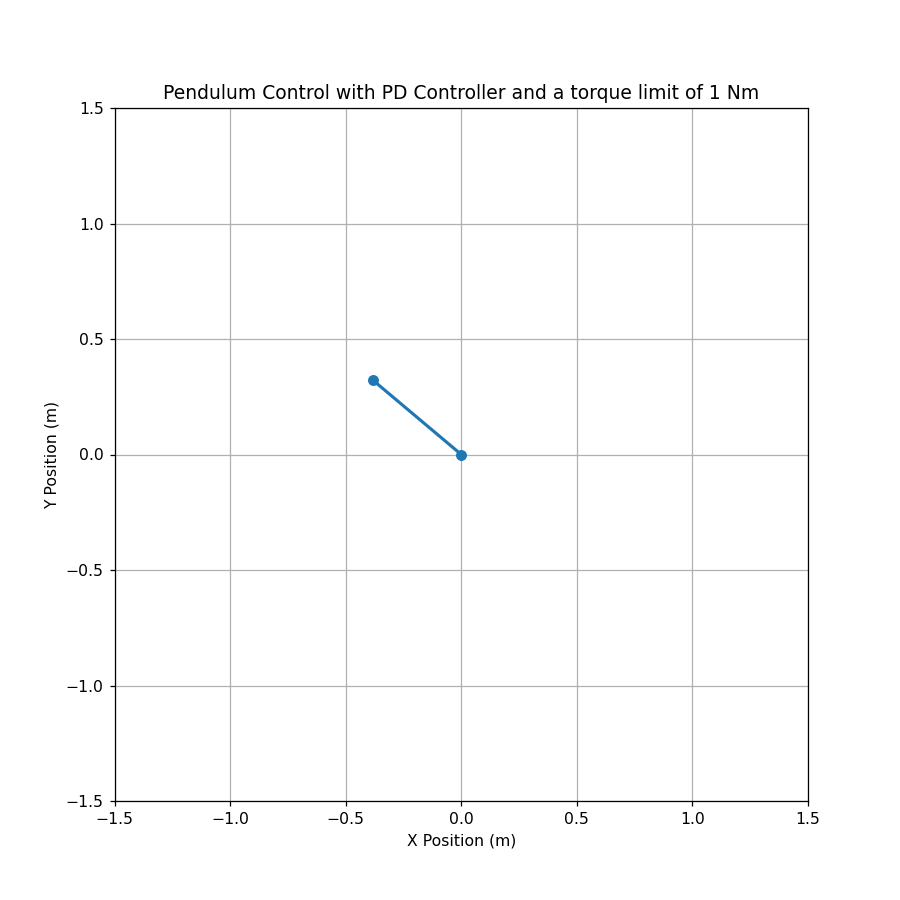

In [13]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([0, l * np.sin(theta[0])], [0, -l * np.cos(theta[0])])
    return line,

def update(frame):
    x = l * np.sin(theta[frame])
    y = -l * np.cos(theta[frame])
    line.set_data([0, x], [0, y])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True, interval=dt*1000)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Pendulum Control with PD Controller and a torque limit of 1 Nm")
plt.show()



##### Reason behind the failed attempt :

A PD controller essentially applies a control law that is proportional to the position and velocity errors, but without enough torque, it cannot generate the energy necessary to move the pendulum past its stable equilibrium and continue to drive it to the unstable equilibrium (upright).

Moreover, a PD controller is best suited for stabilizing around a specific setpoint (such as the upright position) rather than performing a swing-up from the downward position. To swing the pendulum up, sufficient torque is needed to overcome gravity and 1 Nm may be insufficient depending on the system's energy requirements.

## Pnedulum to swing up using 1 Nm torque (Energy Shaping)

It is a energy pumping method in which energy is provided to the system if the current energy $E_{curr}$ becomes less than the desired energy $E_{des}$ to reach the goal. If the energy is more, then energy will be pumped out.

In [14]:
K = 15
theta[0] = 0.1  # Start with a small displacement
omega[0] = 0.0  # Start with zero velocity

In [15]:
# Numerical integration using Euler's method
for i in range(1, len(time)):
    # Compute angular acceleration
    E_des = m*l*g;   # desired energy
    E_curr = 0.5*m*(l**2)*(omega[i - 1]**2) - m*l*g*np.cos(theta[i - 1])
    Tau = -K * omega[i - 1] * (E_curr - E_des) + b * omega[i - 1]
    Tau = np.clip(Tau, -1, 1) 
    alpha = -(b / (m*l**2)) * omega[i - 1] - (g / l) * np.sin(theta[i - 1]) + Tau/(m*l**2)
    
    # Update angular velocity and angle
    omega[i] = omega[i - 1] + alpha * dt
    theta[i] = theta[i - 1] + omega[i] * dt
    
#     print('E_des = ',E_des)
#     print('E_curr = ',E_curr)


<IPython.core.display.Javascript object>


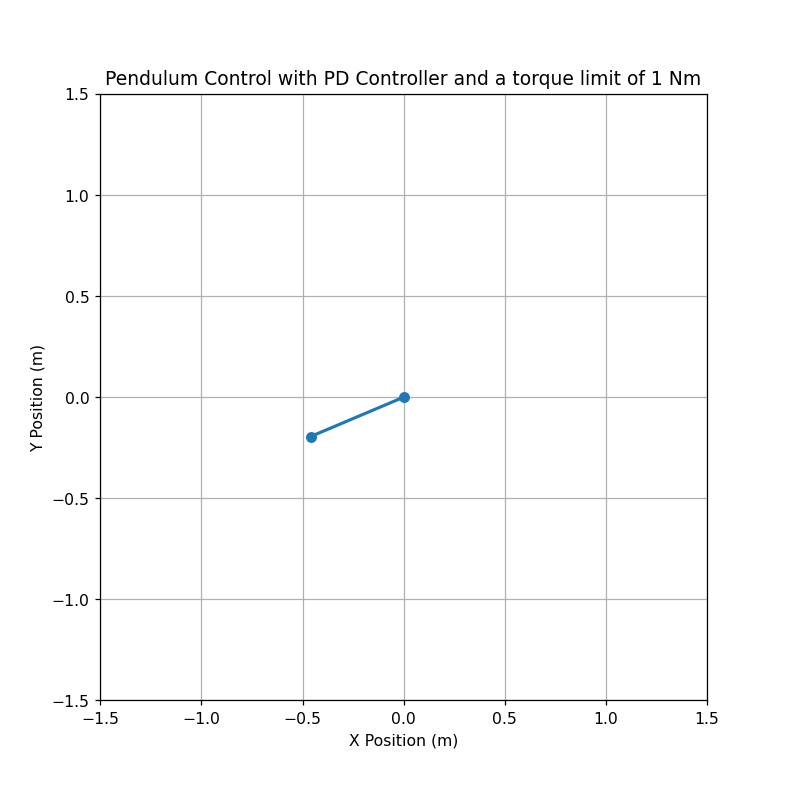

In [16]:
# Visualization
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([0, l * np.sin(theta[0])], [0, -l * np.cos(theta[0])])
    return line,

def update(frame):
    x = l * np.sin(theta[frame])
    y = -l * np.cos(theta[frame])
    line.set_data([0, x], [0, y])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True, interval=dt*1000)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Pendulum Control with PD Controller and a torque limit of 1 Nm")
plt.show()



The controller works better than the PD controller, but it cann't attain stability at upright position. This can be understood from the swing up example. By continously feeding energy, we can reach any joint orientation. But still due to gravity effect, we will come back to the same stable position, until we set a setpoint controller at the fixed points. So, it can be fixed at the upright position by using a PD controller at state $[pi, 0]$